In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df_train = pd.read_csv("D:\Machine Learning\Kaggle\House _Prices_Advanced_Regression\\train.csv")
df_test = pd.read_csv("D:\Machine Learning\Kaggle\House _Prices_Advanced_Regression\\test.csv")

In [3]:
pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#import missingno as msno

#msno.matrix(df_train,figsize=(50,30))

#not much effective because independent variables are too high

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_test.shape

(1459, 80)

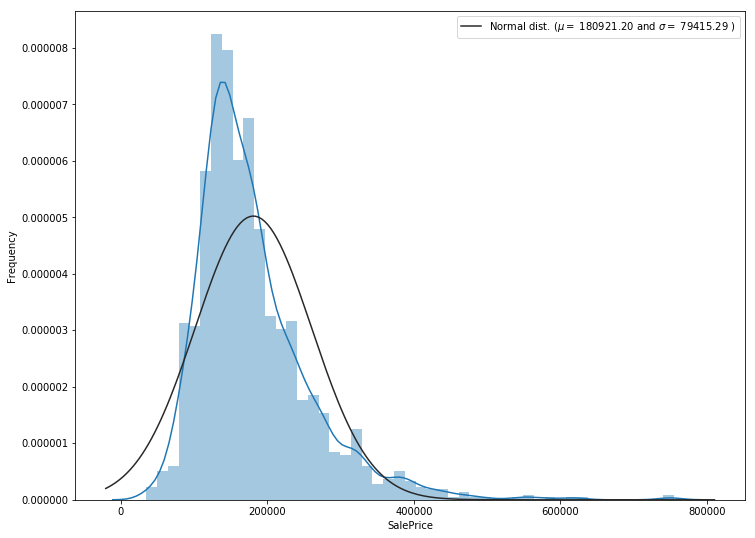

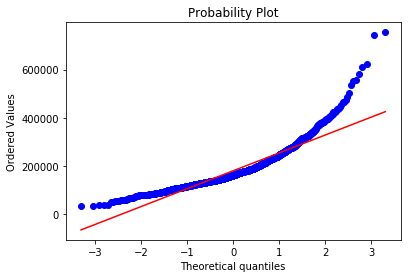

In [9]:
#Target Analysis
plt.subplots(figsize=(12,9))
sns.distplot(df_train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

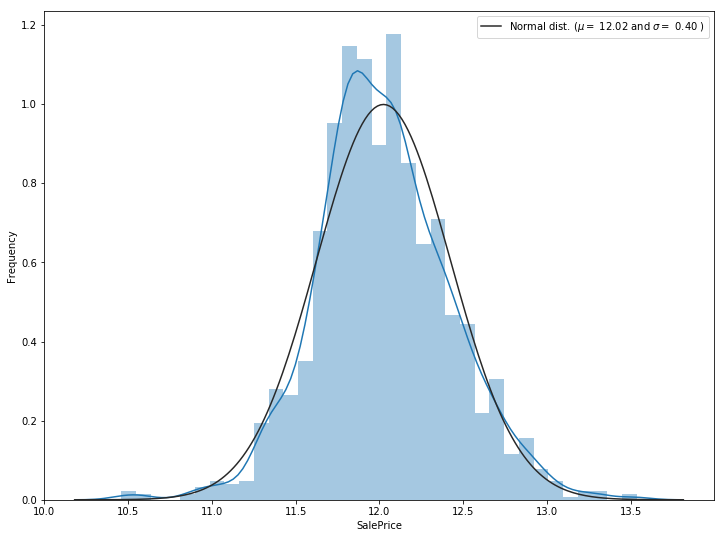

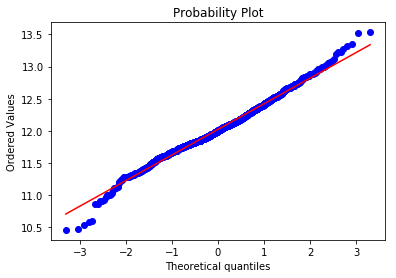

In [10]:
#Here we use log for target variable to make more normal distribution
#we use log function which is in numpy
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df_train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [11]:
#Let's check if the data set has any missing values. 
df_train.columns[df_train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [12]:
df_test.columns[df_test.isnull().any()]

Index([u'MSZoning', u'LotFrontage', u'Alley', u'Utilities', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtFullBath',
       u'BsmtHalfBath', u'KitchenQual', u'Functional', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
       u'GarageArea', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType'],
      dtype='object')

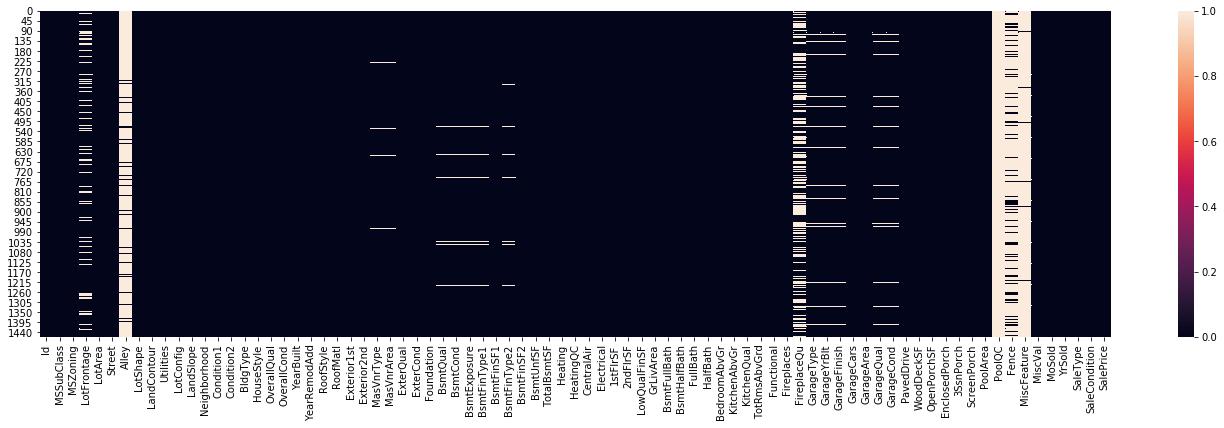

In [13]:
#plot of missing value attributes
plt.figure(figsize=(24, 6))
sns.heatmap(df_train.isnull(), vmax = 1.0)
plt.show()

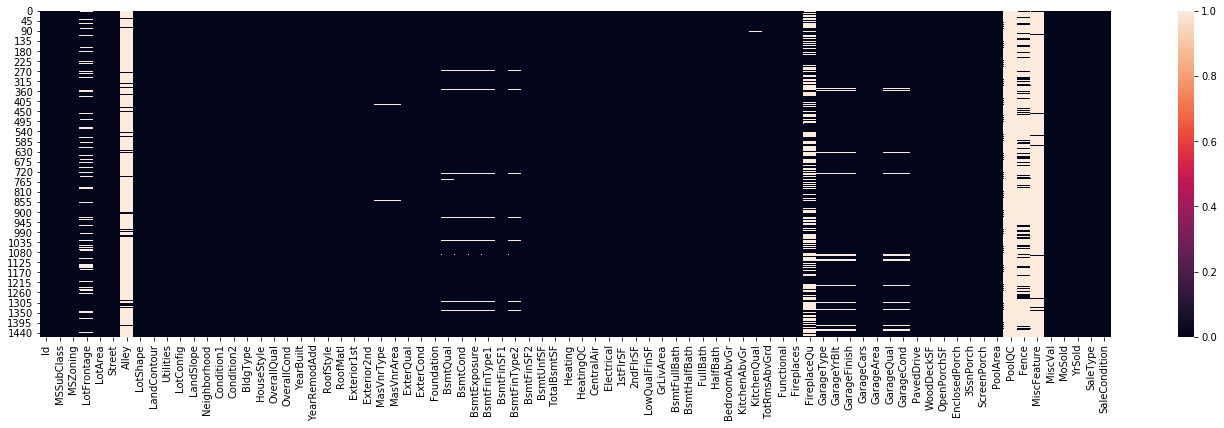

In [14]:
#plot of missing value attributes
plt.figure(figsize=(24, 6))
sns.heatmap(df_test.isnull(), vmax = 1.0)
plt.show()

In [15]:
#missing value counts in each of these columns
Isnull = df_train.isnull().sum()/len(df_train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [16]:
#missing value counts in each of these columns
Isnull = df_test.isnull().sum()/len(df_test)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [17]:
#PoolQC has missing value ratio is 99%+. So, delete them
del df_train['PoolQC']
del df_test['PoolQC']

In [18]:
#Arround 50% missing values attributes have been fill by None
del df_train['MiscFeature'] 
del df_train['Alley'] 
del df_train['Fence'] 
del df_train['FireplaceQu']
del df_test['MiscFeature']
del df_test['Alley'] 
del df_test['Fence'] 
del df_test['FireplaceQu'] 

In [19]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train['LotFrontage'] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage'] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')
    
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df_train[col] = df_train[col].fillna(int(0))
    df_test[col] = df_test[col].fillna(int(0))
    
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df_train[col] = df_train[col].fillna('None')    
    df_test[col] = df_test[col].fillna('None')
    
#MasVnrArea : replace with zero
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(int(0))  
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(int(0))  

#MasVnrType : replace with None
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

#There is put mode value 
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical']).mode()[0]
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical']).mode()[0]
#There is no need of Utilities
df_train = df_train.drop(['Utilities'], axis=1)
df_test = df_test.drop(['Utilities'], axis=1)

In [20]:
df_test.columns[df_test.isnull().any()]

Index([u'MSZoning', u'Exterior1st', u'Exterior2nd', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtFullBath',
       u'BsmtHalfBath', u'KitchenQual', u'Functional', u'SaleType'],
      dtype='object')

In [21]:
df_test['Exterior1st'] = df_test.groupby("Neighborhood")["Exterior1st"].transform(lambda x: x.fillna(x.mode()))

df_test['Exterior2nd'] = df_test.groupby("Neighborhood")["Exterior2nd"].transform(lambda x: x.fillna(x.mode()))

df_test['MSZoning'] = df_test.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode()))

In [22]:
df_test['SaleType'] = df_test['SaleType'].fillna('Oth')

In [23]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual']).mode()[0]

In [24]:
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath']).mode()[0]

In [25]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath']).mode()[0]

In [26]:
df_test['BsmtFinSF1'] = df_test["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))

In [27]:
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))

In [28]:
df_test['BsmtUnfSF'] = df_test["BsmtUnfSF"].transform(lambda x: x.fillna(x.median()))

In [29]:
df_test['TotalBsmtSF'] = df_test["BsmtUnfSF"]+df_test['BsmtFinSF2']+df_test['BsmtFinSF1'] 

In [30]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')

In [31]:
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional','BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType',  
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for c in cols:
    LE = LabelEncoder() 
    LE.fit(list(df_train[c].values)) 
    df_train[c] = LE.transform(list(df_train[c].values))


In [32]:
for c in cols:
    LE = LabelEncoder() 
    LE.fit(list(df_test[c].values)) 
    df_test[c] = LE.transform(list(df_test[c].values))


In [33]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,3,3,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,128,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,1,2,8,4,12.247699
1,2,0,3,80.0,9600,1,3,3,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,4,1,8,4,12.109016
2,3,5,3,68.0,11250,1,0,3,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,104,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,8,2,8,4,12.317171
3,4,6,3,60.0,9550,1,0,3,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,0,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,1,0,8,0,11.849405
4,5,5,3,84.0,14260,1,0,3,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,221,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,11,2,8,4,12.429220


In [34]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,3,3,4,0,12,1,2,0,2,5,5,1961,1961,1,0,10,12,2,0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,0,896,0,0,896,0.0,0.0,1,0,2,1,0,5,6,0,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,0,5,4,8,4
1,1462,0,3,81.0,14267,1,0,3,0,0,12,2,2,0,2,6,5,1958,1958,3,0,11,13,1,58,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,0,1329,0,0,1329,0.0,0.0,1,1,3,1,0,6,6,0,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,12500,5,4,8,4
2,1463,5,3,74.0,13830,1,0,3,4,0,8,2,2,0,4,5,4,1997,1998,1,0,10,12,2,0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,0,928,701,0,1629,0.0,0.0,2,1,3,1,0,6,6,1,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,0,2,4,8,4
3,1464,5,3,78.0,9978,1,0,3,4,0,8,2,2,0,4,6,5,1998,1998,1,0,10,12,1,6,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,0,926,678,0,1604,0.0,0.0,2,1,3,1,0,7,6,1,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,0,5,4,8,4
4,1465,11,3,43.0,5005,1,0,1,4,0,22,2,2,4,2,8,4,1992,1992,1,0,6,6,2,0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,0,1280,0,0,1280,0.0,0.0,2,0,2,1,0,5,6,0,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,0,0,4,8,4


In [35]:
Y_train = df_train['SalePrice']
#Delete the saleprice
del df_train['SalePrice']
del df_train['Id']
Id = df_test['Id']
del df_test['Id']

In [36]:
#Take their values in X and y
X = df_train.values
Y = Y_train.values
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [37]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [38]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [39]:
y_pred_GBR = GBR.predict(df_test)

In [41]:
submission = pd.DataFrame({
        "Id": Id,
        "SalePrice": y_pred_GBR
    })

In [42]:
submission.to_csv('House_Prices_AR.csv', index=False)